In [1]:
# pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 33.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=035c56210f1585cb9dd62f69b4ea54194b391c064afabc3815de1f9521ab959e
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

In [5]:
# pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names = ['label', 'text'])

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, = train_test_split(df, test_size = 0.2, random_state = 0)

In [6]:
data_train.shape, data_test.shape

((4457, 2), (1115, 2))

# Prepare the data

In [7]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df = data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert'         # or distilbert
)

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [8]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [10]:
X_train

[array([[  101,  2053,  1045, ...,     0,     0,     0],
        [  101,  2065,  2017, ...,     0,     0,     0],
        [  101,  2031,  2017, ...,     0,     0,     0],
        ...,
        [  101,  2005, 24471, ...,     0,     0,     0],
        [  101,  1054,  1057, ...,     0,     0,     0],
        [  101,  3461,  3110, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [11]:
X_test

[array([[  101,  4040,  2075, ...,     0,     0,     0],
        [  101,  1026,  2830, ...,     0,     0,     0],
        [  101,  1998,  2036, ...,     0,     0,     0],
        ...,
        [  101,  1045,  2288, ...,     0,     0,     0],
        [  101,  1009, 13138, ...,     0,     0,     0],
        [  101,  2054,  2017, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [12]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilvert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [13]:
type(model)

keras.src.engine.functional.Functional

In [14]:
# here we have taken batch size as 6 as from the documentation it is recommended to use this with maxlen as 500
learner = ktrain.get_learner(model = model, train_data = (X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 6)

In [15]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 471s 603ms/step - loss: 0.5244 - accuracy: 0.7059
Epoch 2/2
743/743 [==============================] - 218s 292ms/step - loss: 2.9080 - accuracy: 0.8186


done.
Visually inspect loss plot and select learning rate associated with falling loss


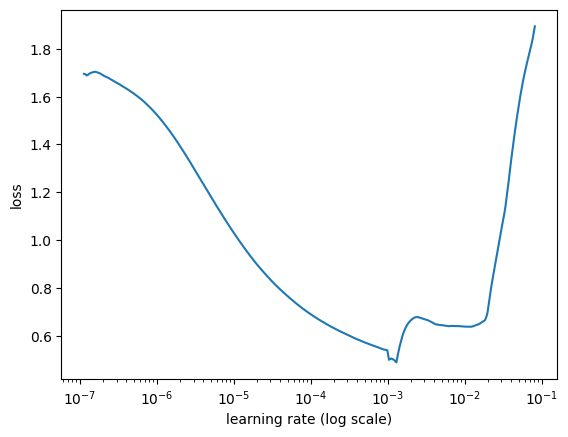

In [16]:
learner.lr_find(show_plot = True, max_epochs = 2)

In [17]:
learner.fit_onecycle(lr = 10e-3, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam--classifier')



begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 513s 660ms/step - loss: 0.7265 - accuracy: 0.8270 - val_loss: 0.4224 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
file = open('sample.csv')
lines = file.readlines()

In [20]:
predictor.predict(lines[0])

'ham'